# Level 1 – Task 2: City Analysis

## 🔍 Objective:
Analyze the restaurant dataset to:
1. Identify the city with the highest number of restaurants.
2. Calculate the average rating for each city.
3. Determine which city has the highest average rating.

## 🛠️ Approach:
- Clean and preprocess the `City` and `Aggregate rating` columns.
- Count the number of restaurants per city.
- Group by city to calculate average ratings.
- Identify the top-performing city by both count and quality.
- Visualize both quantity (bar chart) and quality (average ratings).

## 📈 Insights:
This task gives us a geographical view of the restaurant industry—spotting dense markets and high-rating zones.

🏙️ City with the most restaurants: New Delhi (5473 restaurants)
🌟 City with highest average rating: Inner City (4.90)


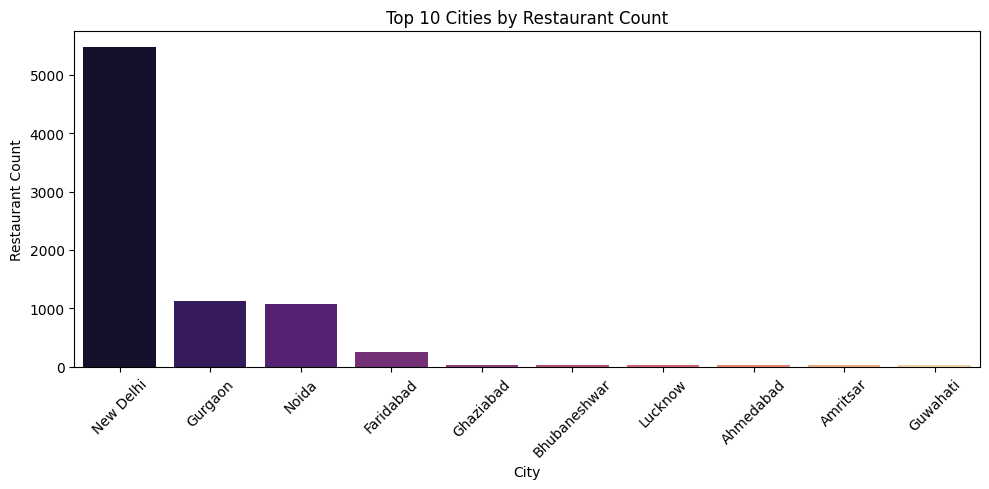

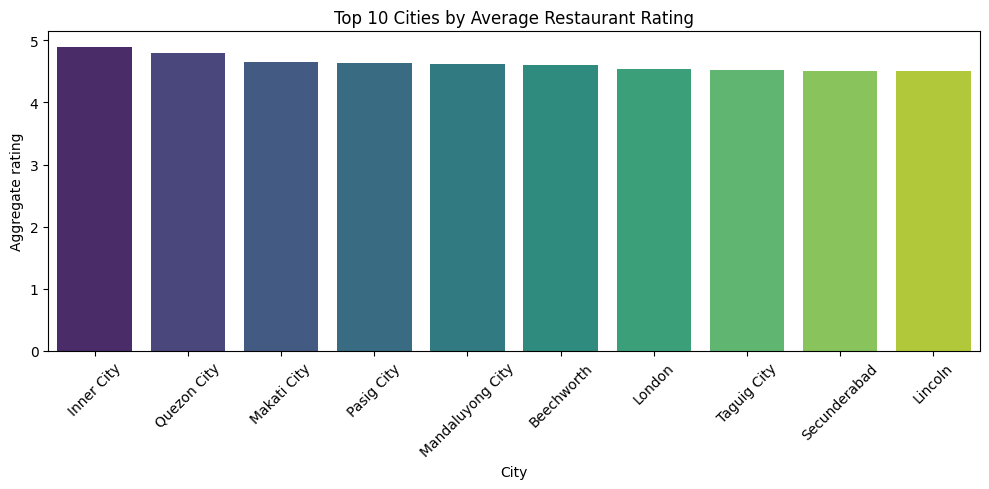

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (from main folder)
df = pd.read_csv("../Dataset.csv")

# Clean: Drop nulls in City or Aggregate rating
df = df.dropna(subset=['City', 'Aggregate rating'])

# Convert ratings to numeric if needed
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Count of restaurants per city
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Restaurant Count']

# Top city by number of restaurants
top_city = city_counts.iloc[0]
print(f"🏙️ City with the most restaurants: {top_city['City']} ({top_city['Restaurant Count']} restaurants)")

# Calculate average rating per city
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().reset_index()
city_avg_rating = city_avg_rating.sort_values(by='Aggregate rating', ascending=False)

# Top city by average rating
top_rated_city = city_avg_rating.iloc[0]
print(f"🌟 City with highest average rating: {top_rated_city['City']} ({top_rated_city['Aggregate rating']:.2f})")

# Optional: Merge and plot
top_10_cities = city_counts.head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top_10_cities, x='City', y='Restaurant Count', hue='City', palette='magma', legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Restaurant Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=city_avg_rating.head(10), x='City', y='Aggregate rating', hue='City', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Average Restaurant Rating")
plt.tight_layout()
plt.show()